In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
plt.rc('font', family='malgun gothic')
plt.rc('figure', figsize=(16,8))
pd.options.display.float_format = '{:.5f}'.format # 과학적 표기법 안쓰는 방법

# 구매 추이 군집 (주군집)

In [ ]:
pur_df = pd.read_csv('./data/lmemdata/구매상품TR.txt',sep = ",",  engine='python', encoding = "cp949",chunksize=2000000)
pur_df = list(pur_df)
pur_df=pd.concat(pur_df)

In [ ]:
category_df = pd.read_excel('./data/goods_category.xlsx')

In [ ]:
pur_df

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120
...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000


In [ ]:
def div_date(df):
    x = df['구매일자'].astype('string')
    
    df['년'] = x.str[:4]
    df['월'] = x.str[4:6]
    df['분기'] = df['년'] + '년' + np.ceil(df['월'].astype('int') / 3).astype('int').astype('string') + '분기'
    

In [ ]:
div_date(pur_df)

In [ ]:
pur_df

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년,월,분기
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,2014,02,2014년1분기
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070,2014,02,2014년1분기
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060,2014,02,2014년1분기
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000,2014,02,2014년1분기
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120,2014,02,2014년1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000,2015,05,2015년2분기
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500,2015,05,2015년2분기
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000,2015,05,2015년2분기
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000,2015,05,2015년2분기


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.]),
 [Text(-1.0, 0, '2015년4분기'),
  Text(0.0, 0, '2014년1분기'),
  Text(1.0, 0, '2014년2분기'),
  Text(2.0, 0, '2014년3분기'),
  Text(3.0, 0, '2014년4분기'),
  Text(4.0, 0, '2015년1분기'),
  Text(5.0, 0, '2015년2분기'),
  Text(6.0, 0, '2015년3분기'),
  Text(7.0, 0, '2015년4분기'),
  Text(8.0, 0, '')])

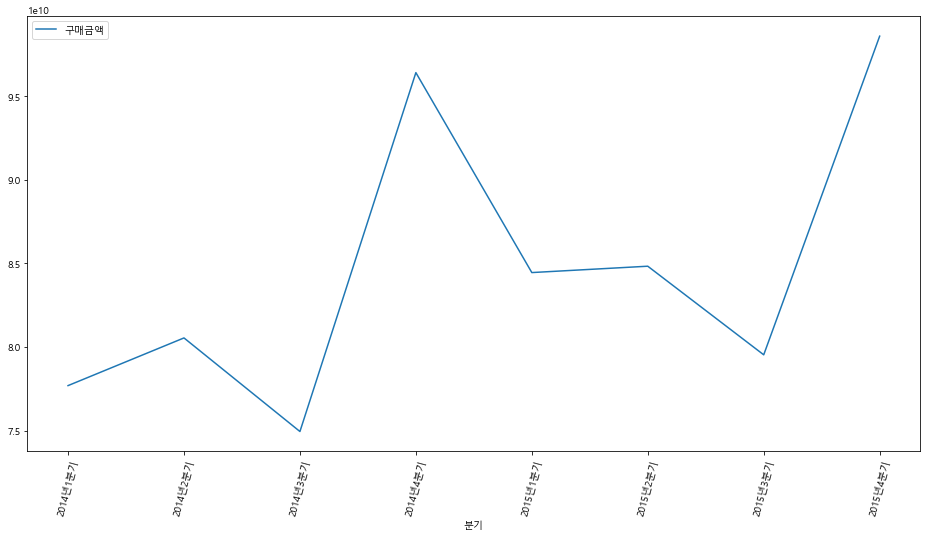

In [ ]:
pur_df.groupby('분기')[['구매금액']].sum().plot()
plt.xticks(rotation=75)

## 고객별 영수증 추이를 보기위한 데이터 전처리

In [ ]:
pur_df.columns

Index(['제휴사', '영수증번호', '대분류코드', '중분류코드', '소분류코드', '고객번호', '점포코드', '구매일자',
       '구매시간', '구매금액', '년', '월', '분기'],
      dtype='object')

In [ ]:
# 고객, 분기, 영수증별 카운트
pur_count_by_mq = pur_df.groupby(['고객번호', '분기'])[['영수증번호']].nunique()
pur_count_by_mq

영수증번호
고객번호  분기             
1     2014년1분기     77
      2014년2분기     82
      2014년3분기    100
      2014년4분기    119
      2015년1분기    111
...               ...
19382 2015년3분기    134
      2015년4분기    155
19383 2015년2분기      3
      2015년3분기     73
      2015년4분기     56

[153895 rows x 1 columns]

In [ ]:
pur_count_by_mq.reset_index(inplace=True)
pur_count_by_mq.rename(columns = {'영수증번호' : '구매횟수'}, inplace=True)
pur_count_by_mq

,고객번호,분기,구매횟수
0,1,2014년1분기,77
1,1,2014년2분기,82
2,1,2014년3분기,100
3,1,2014년4분기,119
4,1,2015년1분기,111
...,...,...,...
153890,19382,2015년3분기,134
153891,19382,2015년4분기,155
153892,19383,2015년2분기,3
153893,19383,2015년3분기,73


In [ ]:
pur_count_by_mq_pivot = pur_count_by_mq.pivot('고객번호', '분기', '구매횟수')
pur_count_by_mq_pivot

분기,2014년1분기,2014년2분기,2014년3분기,2014년4분기,2015년1분기,2015년2분기,2015년3분기,2015년4분기
고객번호,,,,,,,,
1,77.00000,82.00000,100.00000,119.00000,111.00000,74.00000,68.00000,50.00000
2,103.00000,85.00000,95.00000,72.00000,95.00000,71.00000,81.00000,74.00000
3,56.00000,72.00000,94.00000,74.00000,37.00000,57.00000,53.00000,47.00000
4,45.00000,92.00000,56.00000,49.00000,66.00000,68.00000,79.00000,78.00000
5,114.00000,106.00000,59.00000,16.00000,61.00000,20.00000,NaN,50.00000
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,8.00000,48.00000,71.00000,87.00000,84.00000,68.00000
19380,NaN,NaN,NaN,8.00000,36.00000,24.00000,26.00000,138.00000
19381,NaN,NaN,NaN,NaN,60.00000,95.00000,128.00000,119.00000


In [ ]:
pur_count_by_mq_pivot['분기평균'] = np.nanmean(pur_count_by_mq_pivot, axis=1)
pur_count_by_mq_pivot = pur_count_by_mq_pivot.fillna(0)
pur_count_by_mq_pivot

분기,2014년1분기,2014년2분기,2014년3분기,2014년4분기,2015년1분기,2015년2분기,2015년3분기,2015년4분기,분기평균
고객번호,,,,,,,,,
1,77.00000,82.00000,100.00000,119.00000,111.00000,74.00000,68.00000,50.00000,85.12500
2,103.00000,85.00000,95.00000,72.00000,95.00000,71.00000,81.00000,74.00000,84.50000
3,56.00000,72.00000,94.00000,74.00000,37.00000,57.00000,53.00000,47.00000,61.25000
4,45.00000,92.00000,56.00000,49.00000,66.00000,68.00000,79.00000,78.00000,66.62500
5,114.00000,106.00000,59.00000,16.00000,61.00000,20.00000,0.00000,50.00000,60.85714
...,...,...,...,...,...,...,...,...,...
19379,0.00000,0.00000,8.00000,48.00000,71.00000,87.00000,84.00000,68.00000,61.00000
19380,0.00000,0.00000,0.00000,8.00000,36.00000,24.00000,26.00000,138.00000,46.40000
19381,0.00000,0.00000,0.00000,0.00000,60.00000,95.00000,128.00000,119.00000,100.50000


In [ ]:
pur_count_rate_by_mq = pur_count_by_mq_pivot.agg(lambda x : x / x['분기평균'], axis=1).drop(columns='분기평균')
pur_count_rate_by_mq

분기,2014년1분기,2014년2분기,2014년3분기,2014년4분기,2015년1분기,2015년2분기,2015년3분기,2015년4분기
고객번호,,,,,,,,
1,0.90455,0.96329,1.17474,1.39794,1.30396,0.86931,0.79883,0.58737
2,1.21893,1.00592,1.12426,0.85207,1.12426,0.84024,0.95858,0.87574
3,0.91429,1.17551,1.53469,1.20816,0.60408,0.93061,0.86531,0.76735
4,0.67542,1.38086,0.84053,0.73546,0.99062,1.02064,1.18574,1.17073
5,1.87324,1.74178,0.96948,0.26291,1.00235,0.32864,0.00000,0.82160
...,...,...,...,...,...,...,...,...
19379,0.00000,0.00000,0.13115,0.78689,1.16393,1.42623,1.37705,1.11475
19380,0.00000,0.00000,0.00000,0.17241,0.77586,0.51724,0.56034,2.97414
19381,0.00000,0.00000,0.00000,0.00000,0.59701,0.94527,1.27363,1.18408


### 군집화

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [{'n_clusters':[3,4,5,6,10], 
               'init':['k-means++'], 
               'n_init':[10,15,20], 
               'max_iter':[100,300,500], 
               'tol':[0.0001,0.00001]}]

In [ ]:
kmeans = KMeans()

In [ ]:
grid = GridSearchCV(kmeans, param_grid=param_grid)

In [ ]:
grid.fit(pur_count_rate_by_mq)

GridSearchCV(estimator=KMeans(),
             param_grid=[{'init': ['k-means++'], 'max_iter': [100, 300, 500],
                          'n_clusters': [3, 4, 5, 6, 10],
                          'n_init': [10, 15, 20], 'tol': [0.0001, 1e-05]}])

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

-1802.4270092080146
{'init': 'k-means++', 'max_iter': 500, 'n_clusters': 10, 'n_init': 10, 'tol': 0.0001}


In [ ]:
best_kmeans = grid.best_estimator_

In [ ]:
kmeans_1 = KMeans(n_clusters = 3, max_iter = 500, n_init = 10)
kmeans_1.fit(pur_count_rate_by_mq)

KMeans(max_iter=500, n_clusters=3)

In [ ]:
kmeans_2 = KMeans(n_clusters = 4, max_iter= 500, n_init = 10)
kmeans_2.fit(pur_count_rate_by_mq)

KMeans(max_iter=500, n_clusters=4)

In [ ]:
kmeans_3 = KMeans(n_clusters = 5, max_iter= 500, n_init = 10)
kmeans_3.fit(pur_count_rate_by_mq)

KMeans(max_iter=500, n_clusters=5)

### 군집후 라벨값 넣어주기

In [ ]:
cluster_pur_member = pur_count_rate_by_mq.copy()

In [ ]:
cluster_pur_member['일반 군집1'] = kmeans_1.labels_
cluster_pur_member['일반 군집2'] = kmeans_2.labels_
cluster_pur_member['일반 군집3'] = kmeans_3.labels_
# cluster_pur_member['선별 군집'] = best_kmeans.labels_

In [ ]:
cluster_pur_member

분기,2014년1분기,2014년2분기,2014년3분기,2014년4분기,2015년1분기,2015년2분기,2015년3분기,2015년4분기,일반 군집1,일반 군집2,일반 군집3
고객번호,,,,,,,,,,,
1,0.90455,0.96329,1.17474,1.39794,1.30396,0.86931,0.79883,0.58737,1,2,1
2,1.21893,1.00592,1.12426,0.85207,1.12426,0.84024,0.95858,0.87574,0,3,1
3,0.91429,1.17551,1.53469,1.20816,0.60408,0.93061,0.86531,0.76735,1,2,1
4,0.67542,1.38086,0.84053,0.73546,0.99062,1.02064,1.18574,1.17073,0,3,3
5,1.87324,1.74178,0.96948,0.26291,1.00235,0.32864,0.00000,0.82160,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
19379,0.00000,0.00000,0.13115,0.78689,1.16393,1.42623,1.37705,1.11475,2,1,0
19380,0.00000,0.00000,0.00000,0.17241,0.77586,0.51724,0.56034,2.97414,2,1,0
19381,0.00000,0.00000,0.00000,0.00000,0.59701,0.94527,1.27363,1.18408,2,1,0


### 비교 및 시각화

In [ ]:
print('일반 군집1')

print('0번 : ', (cluster_pur_member['일반 군집1'] == 0).sum())
print('1번 : ', (cluster_pur_member['일반 군집1'] == 1).sum())
print('2번 : ', (cluster_pur_member['일반 군집1'] == 2).sum())

print('=='*5)

print('일반 군집2')

print('0번 : ', (cluster_pur_member['일반 군집2'] == 0).sum())
print('1번 : ', (cluster_pur_member['일반 군집2'] == 1).sum())
print('2번 : ', (cluster_pur_member['일반 군집2'] == 2).sum())
print('3번 : ', (cluster_pur_member['일반 군집2'] == 3).sum())

print('=='*5)

print('일반 군집3')

print('0번 : ', (cluster_pur_member['일반 군집3'] == 0).sum())
print('1번 : ', (cluster_pur_member['일반 군집3'] == 1).sum())
print('2번 : ', (cluster_pur_member['일반 군집3'] == 2).sum())
print('3번 : ', (cluster_pur_member['일반 군집3'] == 3).sum())
print('4번 : ', (cluster_pur_member['일반 군집3'] == 4).sum())

print('=='*5)

# print('선별 군집')

# print('0번 : ', (cluster_pur_member['선별 군집'] == 0).sum())
# print('1번 : ', (cluster_pur_member['선별 군집'] == 1).sum())
# print('2번 : ', (cluster_pur_member['선별 군집'] == 2).sum())
# print('3번 : ', (cluster_pur_member['선별 군집'] == 3).sum())
# print('4번 : ', (cluster_pur_member['선별 군집'] == 4).sum())
# print('5번 : ', (cluster_pur_member['선별 군집'] == 5).sum())
# print('6번 : ', (cluster_pur_member['선별 군집'] == 6).sum())
# print('7번 : ', (cluster_pur_member['선별 군집'] == 7).sum())

일반 군집1
0번 :  12503
1번 :  3783
2번 :  3097
일반 군집2
0번 :  6483
1번 :  1213
2번 :  2001
3번 :  9686
일반 군집3
0번 :  1061
1번 :  8008
2번 :  1345
3번 :  6065
4번 :  2904


In [ ]:
cluster_normal1_0 = cluster_pur_member[cluster_pur_member['일반 군집1'] == 0].iloc[:,:8]
cluster_normal1_1 = cluster_pur_member[cluster_pur_member['일반 군집1'] == 1].iloc[:,:8]
cluster_normal1_2 = cluster_pur_member[cluster_pur_member['일반 군집1'] == 2].iloc[:,:8]

cluster_normal2_0 = cluster_pur_member[cluster_pur_member['일반 군집2'] == 0].iloc[:,:8]
cluster_normal2_1 = cluster_pur_member[cluster_pur_member['일반 군집2'] == 1].iloc[:,:8]
cluster_normal2_2 = cluster_pur_member[cluster_pur_member['일반 군집2'] == 2].iloc[:,:8]
cluster_normal2_3 = cluster_pur_member[cluster_pur_member['일반 군집2'] == 3].iloc[:,:8]

cluster_normal3_0 = cluster_pur_member[cluster_pur_member['일반 군집3'] == 0].iloc[:,:8]
cluster_normal3_1 = cluster_pur_member[cluster_pur_member['일반 군집3'] == 1].iloc[:,:8]
cluster_normal3_2 = cluster_pur_member[cluster_pur_member['일반 군집3'] == 2].iloc[:,:8]
cluster_normal3_3 = cluster_pur_member[cluster_pur_member['일반 군집3'] == 3].iloc[:,:8]
cluster_normal3_4 = cluster_pur_member[cluster_pur_member['일반 군집3'] == 4].iloc[:,:8]

# cluster_normal_0 = cluster_pur_member[cluster_pur_member['선별 군집'] == 0].iloc[:,:8]
# cluster_normal_1 = cluster_pur_member[cluster_pur_member['선별 군집'] == 1].iloc[:,:8]
# cluster_normal_2 = cluster_pur_member[cluster_pur_member['선별 군집'] == 2].iloc[:,:8]
# cluster_normal_3 = cluster_pur_member[cluster_pur_member['선별 군집'] == 3].iloc[:,:8]
# cluster_normal_4 = cluster_pur_member[cluster_pur_member['선별 군집'] == 4].iloc[:,:8]
# cluster_normal_5 = cluster_pur_member[cluster_pur_member['선별 군집'] == 5].iloc[:,:8]
# cluster_normal_6 = cluster_pur_member[cluster_pur_member['선별 군집'] == 6].iloc[:,:8]
# cluster_normal_7 = cluster_pur_member[cluster_pur_member['선별 군집'] == 7].iloc[:,:8]

In [ ]:
normal1_0 = cluster_normal1_0.melt()
normal1_1 = cluster_normal1_1.melt()
normal1_2 = cluster_normal1_2.melt()

normal2_0 = cluster_normal2_0.melt()
normal2_1 = cluster_normal2_1.melt()
normal2_2 = cluster_normal2_2.melt()
normal2_3 = cluster_normal2_3.melt()

normal3_0 = cluster_normal3_0.melt()
normal3_1 = cluster_normal3_1.melt()
normal3_2 = cluster_normal3_2.melt()
normal3_3 = cluster_normal3_3.melt()
normal3_4 = cluster_normal3_4.melt()

# normal_0 = cluster_normal_0.melt()
# normal_1 = cluster_normal_1.melt()
# normal_2 = cluster_normal_2.melt()
# normal_3 = cluster_normal_3.melt()
# normal_4 = cluster_normal_4.melt()
# normal_5 = cluster_normal_5.melt()
# normal_6 = cluster_normal_6.melt()
# normal_7 = cluster_normal_7.melt()

<AxesSubplot:xlabel='분기', ylabel='value'>

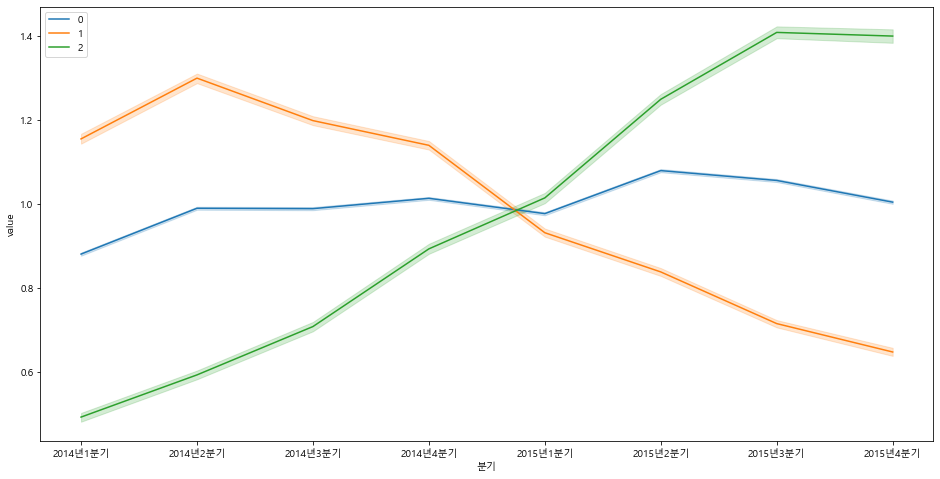

In [ ]:
sns.lineplot(data=normal1_0, x='분기', y='value', label='0')
sns.lineplot(data=normal1_1, x='분기', y='value', label='1')
sns.lineplot(data=normal1_2, x='분기', y='value', label='2')

<AxesSubplot:xlabel='분기', ylabel='value'>

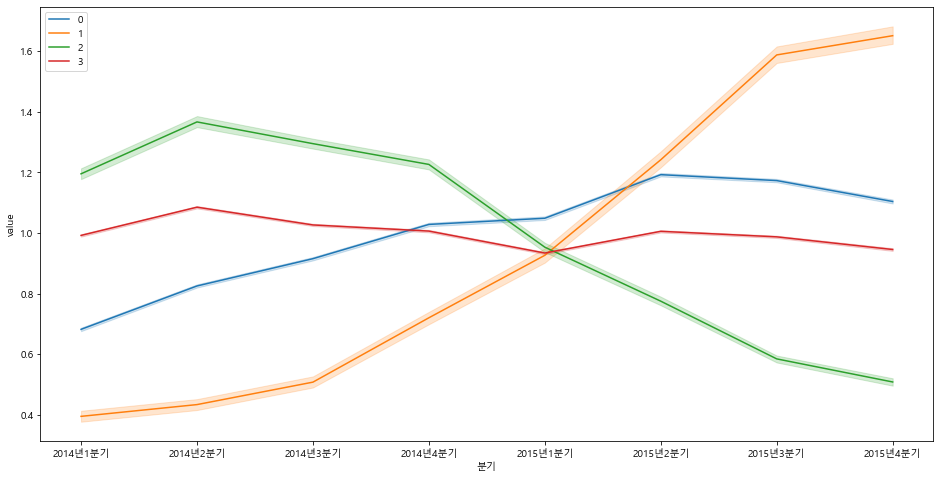

In [ ]:
sns.lineplot(data=normal2_0, x='분기', y='value', label='0')
sns.lineplot(data=normal2_1, x='분기', y='value', label='1')
sns.lineplot(data=normal2_2, x='분기', y='value', label='2')
sns.lineplot(data=normal2_3, x='분기', y='value', label='3')

<AxesSubplot:xlabel='분기', ylabel='value'>

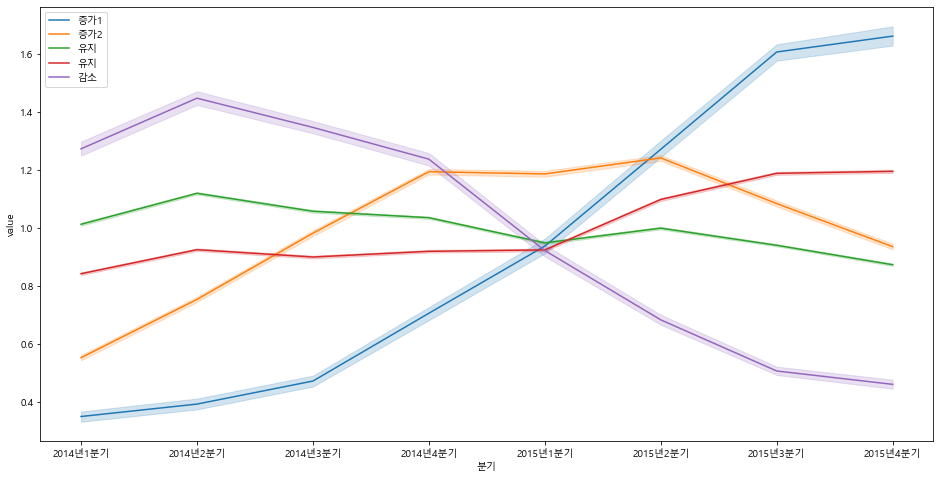

In [ ]:
sns.lineplot(data=normal3_0, x='분기', y='value', label='증가1')
sns.lineplot(data=normal3_4, x='분기', y='value', label='증가2')
sns.lineplot(data=normal3_1, x='분기', y='value', label='유지')
sns.lineplot(data=normal3_3, x='분기', y='value', label='유지')
sns.lineplot(data=normal3_2, x='분기', y='value', label='감소')

<AxesSubplot:xlabel='분기', ylabel='value'>

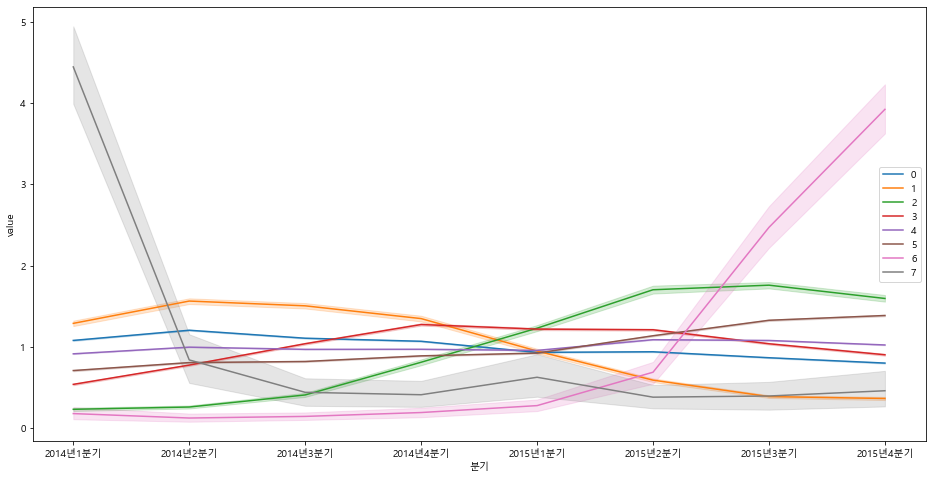

In [ ]:
sns.lineplot(data=normal_0, x='분기', y='value', label='0')
sns.lineplot(data=normal_1, x='분기', y='value', label='1')
sns.lineplot(data=normal_2, x='분기', y='value', label='2')
sns.lineplot(data=normal_3, x='분기', y='value', label='3')
sns.lineplot(data=normal_4, x='분기', y='value', label='4')
sns.lineplot(data=normal_5, x='분기', y='value', label='5')
sns.lineplot(data=normal_6, x='분기', y='value', label='6')
sns.lineplot(data=normal_7, x='분기', y='value', label='7')

<AxesSubplot:xlabel='분기', ylabel='value'>

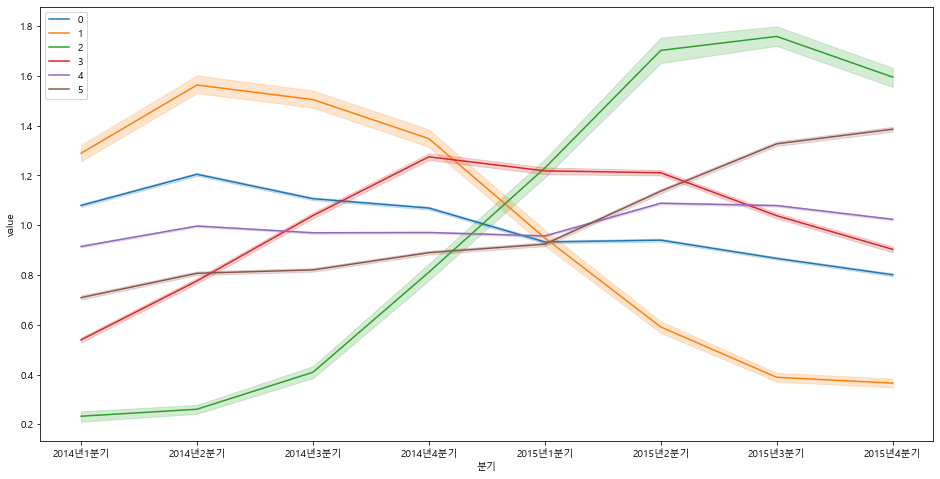

In [ ]:
sns.lineplot(data=normal_0, x='분기', y='value', label='0')
sns.lineplot(data=normal_1, x='분기', y='value', label='1')
sns.lineplot(data=normal_2, x='분기', y='value', label='2')
sns.lineplot(data=normal_3, x='분기', y='value', label='3')
sns.lineplot(data=normal_4, x='분기', y='value', label='4')
sns.lineplot(data=normal_5, x='분기', y='value', label='5')
# sns.lineplot(data=normal_6, x='분기', y='value', label='6')
# sns.lineplot(data=normal_7, x='분기', y='value', label='7')

### 군집 선정
- n_clusters=5인 군집으로 선정
- 유지 : (1,3)  //  증가1 : (0)  //  증가2 : (4)  // 감소 : (2)

In [ ]:
pur_cluster = pd.DataFrame({'고객번호' : np.sort(pur_df['고객번호'].unique())})

In [ ]:
pur_cluster['고객군집'] = kmeans_3.labels_
pur_cluster

,고객번호,고객군집
0,1,1
1,2,1
2,3,1
3,4,3
4,5,2
...,...,...
19378,19379,0
19379,19380,0
19380,19381,0
19381,19382,0


In [ ]:
pur_cluster['고객군집'] = pur_cluster['고객군집'].astype('string')

In [ ]:
pur_cluster['고객군집'] = pur_cluster['고객군집'].agg(lambda x : '유지' if x =='1' or x =='3' else ('증가1' if x == '0' else ('증가2' if x == '4' else '감소')))
pur_cluster

,고객번호,고객군집
0,1,유지
1,2,유지
2,3,유지
3,4,유지
4,5,감소
...,...,...
19378,19379,증가1
19379,19380,증가1
19380,19381,증가1
19381,19382,증가1


In [ ]:
pur_cluster.groupby('고객군집').count()

,고객번호
고객군집,
감소,1345
유지,14073
증가1,1061
증가2,2904


# 이용특성1 군집(부군집)
- 각종 고객 특성
- 평균구매액, 평균구매수, 경쟁사이용(2015), 멤버쉽기간

In [ ]:
# 변수이름 맨 앞 c2는 cluster2     => 2번째 군집때 쓸 데이터라는 뜻

In [ ]:
competitor_df = pd.read_csv('./data/lmemdata/경쟁사이용.txt', sep=',', engine='python', encoding='cp949')
membership_df = pd.read_csv('./data/lmemdata/멤버십여부.txt', sep=',', engine='python', encoding='cp949')

## 분기별 평균구매액, 평균구매수 df만들기
<font size=3>이번 데이터는 신규고객 혹은 이탈고객은 구매를 안했던 분기의 데이터값이 0이되어 데이터의 정확도를 떨어뜨릴 수 있어 NAN값을 제외하고 계산<br>
  => np.nanmean을 사용 </font>

In [ ]:
c2_pur_df = pd.DataFrame({'고객번호' : np.sort(pur_df['고객번호'].unique())})
c2_pur_df

,고객번호
0,1
1,2
2,3
3,4
4,5
...,...
19378,19379
19379,19380
19380,19381
19381,19382


In [ ]:
# 분기별 평균 지출액 df 만들기
c2_pur_sum = pur_df.groupby(['고객번호', '분기'])[['구매금액']].sum().reset_index().pivot('고객번호', '분기', '구매금액')
c2_pur_sum

분기,2014년1분기,2014년2분기,2014년3분기,2014년4분기,2015년1분기,2015년2분기,2015년3분기,2015년4분기
고객번호,,,,,,,,
1,9141590.00000,10783765.00000,10781550.00000,23334762.00000,9302985.00000,8595380.00000,7806580.00000,5295938.00000
2,14123470.00000,10199760.00000,14841180.00000,7080920.00000,18481480.00000,9310130.00000,13842600.00000,12001220.00000
3,302782.00000,548433.00000,648188.00000,394366.00000,279310.00000,312970.00000,421017.00000,258101.00000
4,1309643.00000,3732463.00000,2434410.00000,1823100.00000,1737292.00000,1919645.00000,2127112.00000,1610145.00000
5,3145330.00000,2314820.00000,1827290.00000,398440.00000,2124430.00000,810500.00000,NaN,2616260.00000
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,130300.00000,1060320.00000,1131020.00000,1264900.00000,805550.00000,1387190.00000
19380,NaN,NaN,NaN,522700.00000,486830.00000,351120.00000,368907.00000,2183420.00000
19381,NaN,NaN,NaN,NaN,1124750.00000,1672421.00000,1867501.00000,1375997.00000


In [ ]:
c2_pur_sum_avg = c2_pur_sum.agg(np.nanmean, axis=1).reset_index()
c2_pur_sum_avg

,고객번호,0
0,1,10630318.75000
1,2,12485095.00000
2,3,395645.87500
3,4,2086726.25000
4,5,1891010.00000
...,...,...
19378,19379,963213.33333
19379,19380,782595.40000
19380,19381,1510167.25000
19381,19382,1100443.25000


In [ ]:
c2_pur_df['평균지출액'] = c2_pur_sum_avg[0]

In [ ]:
# 분기별 평균 방문(이용)수 df 만들기
c2_pur_count = pur_df.groupby(['고객번호', '분기'])[['영수증번호']].nunique().reset_index().pivot('고객번호', '분기', '영수증번호')
c2_pur_count

분기,2014년1분기,2014년2분기,2014년3분기,2014년4분기,2015년1분기,2015년2분기,2015년3분기,2015년4분기
고객번호,,,,,,,,
1,77.00000,82.00000,100.00000,119.00000,111.00000,74.00000,68.00000,50.00000
2,103.00000,85.00000,95.00000,72.00000,95.00000,71.00000,81.00000,74.00000
3,56.00000,72.00000,94.00000,74.00000,37.00000,57.00000,53.00000,47.00000
4,45.00000,92.00000,56.00000,49.00000,66.00000,68.00000,79.00000,78.00000
5,114.00000,106.00000,59.00000,16.00000,61.00000,20.00000,NaN,50.00000
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,8.00000,48.00000,71.00000,87.00000,84.00000,68.00000
19380,NaN,NaN,NaN,8.00000,36.00000,24.00000,26.00000,138.00000
19381,NaN,NaN,NaN,NaN,60.00000,95.00000,128.00000,119.00000


In [ ]:
c2_pur_count_avg = c2_pur_count.agg(np.nanmean, axis=1).reset_index()
c2_pur_count_avg

,고객번호,0
0,1,85.12500
1,2,84.50000
2,3,61.25000
3,4,66.62500
4,5,60.85714
...,...,...
19378,19379,61.00000
19379,19380,46.40000
19380,19381,100.50000
19381,19382,108.75000


In [ ]:
c2_pur_df['평균방문수'] = c2_pur_count_avg[0]

In [ ]:
c2_pur_df

,고객번호,평균지출액,평균방문수
0,1,10630318.75000,85.12500
1,2,12485095.00000,84.50000
2,3,395645.87500,61.25000
3,4,2086726.25000,66.62500
4,5,1891010.00000,60.85714
...,...,...,...
19378,19379,963213.33333,61.00000
19379,19380,782595.40000,46.40000
19380,19381,1510167.25000,100.50000
19381,19382,1100443.25000,108.75000


- 구매품목단가 칼럼 만들기

## 경쟁사이용 df만들기

In [ ]:
c2_com_df = competitor_df.groupby('고객번호')[['이용년월']].count().reset_index()
c2_com_df.rename(columns={'이용년월' : '경쟁사이용'}, inplace=True)

In [ ]:
c2_com_df

,고객번호,경쟁사이용
0,1,15
1,2,8
2,4,3
3,7,1
4,8,3
...,...,...
5876,19370,24
5877,19372,4
5878,19375,6
5879,19376,1


## 멤버쉽 기간 df만들기
- 멤버쉽 기간은 월단위로 계산(일단위, 년단위는 데이터가 너무 작거나 클 것을 우려)

In [ ]:
membership_df

,고객번호,멤버십명,가입년월
0,11,하이마트,201512
1,21,하이마트,201506
2,37,하이마트,201306
3,43,하이마트,201403
4,44,하이마트,201411
...,...,...,...
7451,19377,롭스,201411
7452,19379,롭스,201412
7453,19380,롭스,201412
7454,19381,다둥이,201506


In [ ]:
from datetime import datetime

def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

In [ ]:
# 가입년월을 datetime으로 형변환 하기위해 먼저 string으로 바꿔준후 다시 datetime으로 변환
membership_df['가입년월'] = membership_df['가입년월'].astype('string')

membership_df['가입년월'] = membership_df.agg(lambda x : datetime.strptime(x.가입년월, '%Y%m'), axis=1)
membership_df

,고객번호,멤버십명,가입년월
0,11,하이마트,2015-12-01
1,21,하이마트,2015-06-01
2,37,하이마트,2013-06-01
3,43,하이마트,2014-03-01
4,44,하이마트,2014-11-01
...,...,...,...
7451,19377,롭스,2014-11-01
7452,19379,롭스,2014-12-01
7453,19380,롭스,2014-12-01
7454,19381,다둥이,2015-06-01


In [ ]:
basic_date = datetime.strptime('201601', '%Y%m')
basic_date

datetime.datetime(2016, 1, 1, 0, 0)

In [ ]:
membership_df['가입기간'] = membership_df.agg(lambda x : diff_month(basic_date, x.가입년월), axis=1)
membership_df

,고객번호,멤버십명,가입년월,가입기간
0,11,하이마트,2015-12-01,1
1,21,하이마트,2015-06-01,7
2,37,하이마트,2013-06-01,31
3,43,하이마트,2014-03-01,22
4,44,하이마트,2014-11-01,14
...,...,...,...,...
7451,19377,롭스,2014-11-01,14
7452,19379,롭스,2014-12-01,13
7453,19380,롭스,2014-12-01,13
7454,19381,다둥이,2015-06-01,7


In [ ]:
c2_mem_df = membership_df.iloc[:, [0,3]]
c2_mem_df

,고객번호,가입기간
0,11,1
1,21,7
2,37,31
3,43,22
4,44,14
...,...,...
7451,19377,14
7452,19379,13
7453,19380,13
7454,19381,7


In [ ]:
c2_mem_df.고객번호.unique().size

6498

In [ ]:
# 이런 통합 멤버쉽이 아니였네;;

In [ ]:
# 그냥 긴걸로 ㄱㄱ
c2_mem_df = c2_mem_df.groupby('고객번호')[['가입기간']].max().reset_index()
c2_mem_df

,고객번호,가입기간
0,11,1
1,21,7
2,37,31
3,43,22
4,44,14
...,...,...
6493,19377,14
6494,19379,13
6495,19380,13
6496,19381,7


## 각 특성 df 합치기

In [ ]:
c2_df = c2_pur_df.merge(c2_com_df, how='outer').merge(c2_mem_df, how='outer').fillna(0)
c2_df

,고객번호,평균지출액,평균방문수,경쟁사이용,가입기간
0,1,10630318.75000,85.12500,15.00000,0.00000
1,2,12485095.00000,84.50000,8.00000,0.00000
2,3,395645.87500,61.25000,0.00000,0.00000
3,4,2086726.25000,66.62500,3.00000,0.00000
4,5,1891010.00000,60.85714,0.00000,0.00000
...,...,...,...,...,...
19378,19379,963213.33333,61.00000,0.00000,13.00000
19379,19380,782595.40000,46.40000,0.00000,13.00000
19380,19381,1510167.25000,100.50000,0.00000,7.00000
19381,19382,1100443.25000,108.75000,0.00000,0.00000


In [ ]:
c2_df = c2_df.merge(pur_cluster)
c2_df

,고객번호,평균지출액,평균방문수,경쟁사이용,가입기간,고객군집
0,1,10630318.75000,85.12500,15.00000,0.00000,유지
1,2,12485095.00000,84.50000,8.00000,0.00000,유지
2,3,395645.87500,61.25000,0.00000,0.00000,유지
3,4,2086726.25000,66.62500,3.00000,0.00000,유지
4,5,1891010.00000,60.85714,0.00000,0.00000,감소
...,...,...,...,...,...,...
19378,19379,963213.33333,61.00000,0.00000,13.00000,증가1
19379,19380,782595.40000,46.40000,0.00000,13.00000,증가1
19380,19381,1510167.25000,100.50000,0.00000,7.00000,증가1
19381,19382,1100443.25000,108.75000,0.00000,0.00000,증가1


In [ ]:
c2_df.iloc[:,1:5].corr()

,평균지출액,평균방문수,경쟁사이용,가입기간
평균지출액,1.00000,0.14264,0.04654,-0.03687
평균방문수,0.14264,1.00000,0.01241,-0.09617
경쟁사이용,0.04654,0.01241,1.00000,-0.02639
가입기간,-0.03687,-0.09617,-0.02639,1.00000


## 스케일링과 분류를 활용한 피처중요도

- 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [ ]:
c2_df

,고객번호,평균지출액,평균방문수,경쟁사이용,가입기간,고객군집
0,1,10630318.75000,85.12500,15.00000,0.00000,유지
1,2,12485095.00000,84.50000,8.00000,0.00000,유지
2,3,395645.87500,61.25000,0.00000,0.00000,유지
3,4,2086726.25000,66.62500,3.00000,0.00000,유지
4,5,1891010.00000,60.85714,0.00000,0.00000,감소
...,...,...,...,...,...,...
19378,19379,963213.33333,61.00000,0.00000,13.00000,증가1
19379,19380,782595.40000,46.40000,0.00000,13.00000,증가1
19380,19381,1510167.25000,100.50000,0.00000,7.00000,증가1
19381,19382,1100443.25000,108.75000,0.00000,0.00000,증가1


In [ ]:
c2_label = LabelEncoder().fit_transform(c2_df['고객군집'])
c2_label

array([1, 1, 1, ..., 2, 2, 2])

In [ ]:
scaled_c2_main_features = StandardScaler().fit_transform(c2_df.iloc[:,1:3])
scaled_c2_main_features

array([[ 0.7702871 ,  0.63243669],
       [ 0.99908637,  0.60268969],
       [-0.49222945, -0.50389866],
       ...,
       [-0.35474565,  1.36421286],
       [-0.4052879 ,  1.75687324],
       [-0.44299107, -1.32491583]])

In [ ]:
scaled_c2_features = StandardScaler().fit_transform(c2_df.iloc[:,1:5])
scaled_c2_features

array([[ 0.7702871 ,  0.63243669,  3.79288469, -0.59377296],
       [ 0.99908637,  0.60268969,  1.83306053, -0.59377296],
       [-0.49222945, -0.50389866, -0.40673852, -0.59377296],
       ...,
       [-0.35474565,  1.36421286, -0.40673852,  0.06899736],
       [-0.4052879 ,  1.75687324, -0.40673852, -0.59377296],
       [-0.44299107, -1.32491583, -0.40673852, -0.02568411]])

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
c2_features_over, c2_labels_over = smote.fit_resample(scaled_c2_df, c2_label)

In [ ]:
print(scaled_c2_df.shape, c2_label.shape)

(19383, 4) (19383,)


In [ ]:
print(c2_features_over.shape, c2_labels_over.shape)

(56292, 4) (56292,)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [ ]:
# DecisionTree,RandomForest, XGBoost, LightGBM

In [ ]:
dt_clf = DecisionTreeClassifier(max_depth=5)
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=5)
xgb_clf = XGBClassifier(n_estimators=500)
lgbm_clf = LGBMClassifier(n_estimators=500)

In [ ]:
clf = [dt_clf, rf_clf, xgb_clf, lgbm_clf]
for i in range(len(clf)):
    scores = cross_val_score(clf[i], c2_features_over, c2_labels_over, scoring='accuracy', cv = 5)
    print(f'{i}번 정확도 : ', scores.mean())

0번 정확도 :  0.32059595331176677
1번 정확도 :  0.33846699786299145
2번 정확도 :  0.6578924933719158
3번 정확도 :  0.6268036966964199


In [ ]:
xgb_clf = XGBClassifier(n_estimators=500, learning_rate=0.4, max_depth=6)
scores = cross_val_score(xgb_clf, c2_features_over, c2_labels_over, scoring='accuracy', cv = 5)
scores.mean()

0.6701678944245169

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=500, learning_rate=0.2, num_leaves=50)
scores = cross_val_score(lgbm_clf, c2_features_over, c2_labels_over, scoring='accuracy', cv = 5)
scores.mean()

0.6709662813954439

In [ ]:
xgb_clf.fit(c2_features_over, c2_labels_over)
lgbm_clf.fit(c2_features_over, c2_labels_over)

LGBMClassifier(n_estimators=500)

In [ ]:
print(c2_df.iloc[:,1:5].columns)
print(xgb_clf.feature_importances_)
print(lgbm_clf.feature_importances_)

Index(['평균지출액', '평균방문수', '이용횟수', '가입기간'], dtype='object')
[0.18063766 0.24537285 0.26155362 0.3124359 ]
[18913 20896  8433 11758]


- 군집

In [ ]:
# 선택1

In [ ]:
kmeans_c2 = KMeans(n_clusters = 4, max_iter = 500)
kmeans_c2.fit(scaled_c2_df)

KMeans(max_iter=500, n_clusters=4)

In [ ]:
c2_df['특성군집'] = kmeans_c2.labels_
c2_df

,고객번호,평균지출액,평균방문수,경쟁사이용,가입기간,고객군집,특성군집
0,1,10630318.75000,85.12500,15.00000,0.00000,유지,3
1,2,12485095.00000,84.50000,8.00000,0.00000,유지,3
2,3,395645.87500,61.25000,0.00000,0.00000,유지,0
3,4,2086726.25000,66.62500,3.00000,0.00000,유지,0
4,5,1891010.00000,60.85714,0.00000,0.00000,감소,0
...,...,...,...,...,...,...,...
19378,19379,963213.33333,61.00000,0.00000,13.00000,증가1,0
19379,19380,782595.40000,46.40000,0.00000,13.00000,증가1,0
19380,19381,1510167.25000,100.50000,0.00000,7.00000,증가1,1
19381,19382,1100443.25000,108.75000,0.00000,0.00000,증가1,1


In [ ]:
# 선택2

In [ ]:
kmeans_main_c2 = KMeans(n_clusters = 4, max_iter = 500)
kmeans_main_c2.fit(scaled_c2_main_features)

KMeans(max_iter=500, n_clusters=4)

In [ ]:
c2_df['특성군집'] = kmeans_main_c2.labels_
c2_df

,고객번호,평균지출액,평균방문수,경쟁사이용,가입기간,고객군집,특성군집
0,1,10630318.75000,85.12500,15.00000,0.00000,유지,0
1,2,12485095.00000,84.50000,8.00000,0.00000,유지,2
2,3,395645.87500,61.25000,0.00000,0.00000,유지,1
3,4,2086726.25000,66.62500,3.00000,0.00000,유지,1
4,5,1891010.00000,60.85714,0.00000,0.00000,감소,1
...,...,...,...,...,...,...,...
19378,19379,963213.33333,61.00000,0.00000,13.00000,증가1,1
19379,19380,782595.40000,46.40000,0.00000,13.00000,증가1,1
19380,19381,1510167.25000,100.50000,0.00000,7.00000,증가1,0
19381,19382,1100443.25000,108.75000,0.00000,0.00000,증가1,0


In [ ]:
c2_df.iloc[:,1:].groupby('특성군집').mean()

,평균지출액,평균방문수,경쟁사이용,가입기간
특성군집,,,,
0,3670952.10077,94.45364,1.46038,5.20075
1,2752069.36015,60.13424,1.41604,7.01116
2,19139295.74419,78.31903,1.71938,4.30721
3,182930821.28906,80.36406,2.62500,13.31250


In [ ]:
c2_count_t_df = c2_df.groupby('특성군집')[['고객번호']].count().T
c2_count_t_df

특성군집,0,1,2,3
고객번호,5843,12095,1429,16


In [ ]:
c2_count_t_df['4'] = int(c2_count_t_df.sum(axis=1))
c2_count_t_df.rename(index={'고객번호' : '종합고객'})

특성군집,0,1,2,3,4
종합고객,5843,12095,1429,16,19383


In [ ]:
c2_count_t_rate_df = c2_count_t_df.agg(lambda x : x / x['4'], axis=1) *100
c2_count_t_rate_df

특성군집,0,1,2,3,4
고객번호,30.14497,62.40004,7.37244,0.08255,100.00000


In [ ]:
c2_count_df = c2_df.groupby(['고객군집', '특성군집'])[['고객번호']].count().reset_index().pivot('고객군집', '특성군집', '고객번호')
c2_count_df

특성군집,0,1,2,3
고객군집,,,,
감소,321,934,87,3
유지,4394,8613,1061,5
증가1,294,704,60,3
증가2,834,1844,221,5


In [ ]:
c2_count_df['4'] = c2_count_df.sum(axis=1)
c2_count_df

특성군집,0,1,2,3,4
고객군집,,,,,
감소,321,934,87,3,1345
유지,4394,8613,1061,5,14073
증가1,294,704,60,3,1061
증가2,834,1844,221,5,2904


In [ ]:
c2_count_rate_df = c2_count_df.agg(lambda x : x / x['4'], axis=1) * 100
c2_count_rate_df

특성군집,0,1,2,3,4
고객군집,,,,,
감소,23.86617,69.44238,6.46840,0.22305,100.00000
유지,31.22291,61.20230,7.53926,0.03553,100.00000
증가1,27.70971,66.35250,5.65504,0.28275,100.00000
증가2,28.71901,63.49862,7.61019,0.17218,100.00000


In [ ]:
c2_rate_df = pd.concat([c2_count_rate_df, c2_count_t_rate_df])
c2_rate_df.rename(index={'고객번호' : '종합'}, inplace=True)
c2_rate_df.drop(columns='4', inplace=True)
c2_rate_df

특성군집,0,1,2,3
감소,23.86617,69.44238,6.46840,0.22305
유지,31.22291,61.20230,7.53926,0.03553
증가1,27.70971,66.35250,5.65504,0.28275
증가2,28.71901,63.49862,7.61019,0.17218
종합,30.14497,62.40004,7.37244,0.08255


In [ ]:
c2_rate_df.agg(lambda x : np.where(x > x['종합'], '이상', '이하')).drop(index='종합')

특성군집,0,1,2,3
감소,이하,이상,이하,이상
유지,이상,이하,이상,이하
증가1,이하,이상,이하,이상
증가2,이하,이상,이상,이상


In [ ]:
c2_df.iloc[:,1:].groupby('특성군집').mean().T

특성군집,0,1,2,3
평균지출액,3670952.10077,2752069.36015,19139295.74419,182930821.28906
평균방문수,94.45364,60.13424,78.31903,80.36406
경쟁사이용,1.46038,1.41604,1.71938,2.62500
가입기간,5.20075,7.01116,4.30721,13.31250


# 이용특성2 군집(부군집)
- 대분류별 고객 특성

In [ ]:
pur_df

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년,월,분기
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,2014,02,2014년1분기
1,B,8664000,16,1601,B160101,17218,44,20140222,20,1070,2014,02,2014년1분기
2,B,8664000,16,1602,B160201,17218,44,20140222,20,8060,2014,02,2014년1분기
3,B,8664000,18,1803,B180301,17218,44,20140222,20,6000,2014,02,2014년1분기
4,B,8664001,5,509,B050901,17674,44,20140222,22,1120,2014,02,2014년1분기
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,8116737,37,3709,B370904,7439,29,20150525,19,14000,2015,05,2015년2분기
28593026,B,8116738,37,3709,B370904,16421,29,20150525,20,6500,2015,05,2015년2분기
28593027,B,8116739,8,802,B080203,8266,29,20150525,13,16000,2015,05,2015년2분기
28593028,B,8116764,90,9001,B900103,14316,29,20150526,19,1000,2015,05,2015년2분기


In [ ]:
category_df

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,대분류
0,A,1,101,A010101,일용잡화,위생세제,일상용품
1,A,1,101,A010102,일용잡화,휴지류,일상용품
2,A,1,101,A010103,일용잡화,뷰티상품,일상용품
3,A,1,101,A010104,일용잡화,일용잡화,일상용품
4,A,1,101,A010105,일용잡화,세트상품,일상용품
...,...,...,...,...,...,...,...
4381,D,8,802,D080204,아이메이크업,아이섀도우,일상용품
4382,D,8,802,D080205,아이메이크업,메이크업세트,일상용품
4383,D,8,803,D080301,립메이크업,립스틱/립라이너,일상용품
4384,D,8,803,D080302,립메이크업,립글로즈/틴트,일상용품


In [ ]:
t_pur_df = pur_df.merge(category_df)
t_pur_df

,제휴사,영수증번호,대분류코드,중분류코드,소분류코드,고객번호,점포코드,구매일자,구매시간,구매금액,년,월,분기,중분류명,소분류명,대분류
0,B,8664000,15,1504,B150401,17218,44,20140222,20,2420,2014,02,2014년1분기,탄산음료,사이다,가공식품
1,B,8664007,15,1504,B150401,11303,44,20140222,13,2400,2014,02,2014년1분기,탄산음료,사이다,가공식품
2,B,8919520,15,1504,B150401,13210,48,20150921,19,5250,2015,09,2015년3분기,탄산음료,사이다,가공식품
3,B,6956422,15,1504,B150401,13823,12,20140813,18,2250,2014,08,2014년3분기,탄산음료,사이다,가공식품
4,B,6957156,15,1504,B150401,18970,12,20140831,22,4900,2014,08,2014년3분기,탄산음료,사이다,가공식품
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28593025,B,7269975,14,1415,B141503,134,16,20141130,15,8900,2014,11,2014년4분기,전통과자,온라인팥빙수재료,가공식품
28593026,B,7946814,68,6802,B680209,18484,26,20141227,14,1000,2014,12,2014년4분기,여성양말,여성발가락,패션잡화
28593027,B,7777110,7,702,B070203,5043,21,20151012,22,4510,2015,10,2015년4분기,즉석구이안주,즉석쥐포,가공식품
28593028,B,7579178,7,703,B070305,4073,18,20140125,20,8900,2014,01,2014년1분기,마른안주,온라인 안주,가공식품


In [ ]:
count_by_mc = t_pur_df.groupby(['고객번호', '대분류'])['영수증번호'].count().reset_index()
count_by_mc_pivot = count_by_mc.pivot('고객번호', '대분류', '영수증번호').fillna(0)
count_by_mc_pivot

대분류,가공식품,가구/인테리어,교육/문화용품,기타,디지털/가전,신선식품,음식점,의류,의약품/의료기기,일상용품,전문스포츠/레저,패션잡화
고객번호,,,,,,,,,,,,
1,369.00000,0.00000,0.00000,27.00000,20.00000,272.00000,13.00000,154.00000,0.00000,196.00000,6.00000,0.00000
2,248.00000,0.00000,0.00000,5.00000,14.00000,464.00000,0.00000,99.00000,0.00000,283.00000,2.00000,1.00000
3,816.00000,0.00000,0.00000,0.00000,0.00000,204.00000,8.00000,1.00000,0.00000,162.00000,0.00000,0.00000
4,426.00000,1.00000,1.00000,9.00000,6.00000,290.00000,0.00000,75.00000,0.00000,107.00000,8.00000,7.00000
5,264.00000,0.00000,0.00000,0.00000,2.00000,376.00000,0.00000,12.00000,0.00000,63.00000,2.00000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
19379,238.00000,0.00000,0.00000,2.00000,0.00000,14.00000,0.00000,11.00000,0.00000,312.00000,0.00000,7.00000
19380,258.00000,0.00000,0.00000,1.00000,0.00000,8.00000,0.00000,0.00000,0.00000,172.00000,0.00000,1.00000
19381,371.00000,0.00000,2.00000,0.00000,2.00000,284.00000,32.00000,11.00000,0.00000,86.00000,0.00000,17.00000


In [ ]:
count_by_mc_pivot['총구매'] = count_by_mc_pivot.sum(axis=1)

In [ ]:
count_rate_by_mc = count_by_mc_pivot.agg(lambda x : x / x['총구매'], axis=1).drop(columns='총구매')

In [ ]:
count_rate_by_mc

대분류,가공식품,가구/인테리어,교육/문화용품,기타,디지털/가전,신선식품,음식점,의류,의약품/의료기기,일상용품,전문스포츠/레저,패션잡화
고객번호,,,,,,,,,,,,
1,0.34910,0.00000,0.00000,0.02554,0.01892,0.25733,0.01230,0.14570,0.00000,0.18543,0.00568,0.00000
2,0.22222,0.00000,0.00000,0.00448,0.01254,0.41577,0.00000,0.08871,0.00000,0.25358,0.00179,0.00090
3,0.68514,0.00000,0.00000,0.00000,0.00000,0.17128,0.00672,0.00084,0.00000,0.13602,0.00000,0.00000
4,0.45806,0.00108,0.00108,0.00968,0.00645,0.31183,0.00000,0.08065,0.00000,0.11505,0.00860,0.00753
5,0.36718,0.00000,0.00000,0.00000,0.00278,0.52295,0.00000,0.01669,0.00000,0.08762,0.00278,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...
19379,0.40753,0.00000,0.00000,0.00342,0.00000,0.02397,0.00000,0.01884,0.00000,0.53425,0.00000,0.01199
19380,0.58636,0.00000,0.00000,0.00227,0.00000,0.01818,0.00000,0.00000,0.00000,0.39091,0.00000,0.00227
19381,0.46087,0.00000,0.00248,0.00000,0.00248,0.35280,0.03975,0.01366,0.00000,0.10683,0.00000,0.02112


In [ ]:
param_grid = [{'n_clusters':[3,4,5,6], 
               'init':['k-means++'], 
               'n_init':[5,10,15], 
               'max_iter':[100,300,500], 
               'tol':[0.0001,0.00001]}]

In [ ]:
kmeans_cate = KMeans()

In [ ]:
grid = GridSearchCV(kmeans_cate, param_grid=param_grid)

In [ ]:
scale_by_mc_df = StandardScaler().fit_transform(count_rate_by_mc)

In [ ]:
grid.fit(scale_by_mc_df)

GridSearchCV(estimator=KMeans(),
             param_grid=[{'init': ['k-means++'], 'max_iter': [100, 300, 500],
                          'n_clusters': [3, 4, 5, 6], 'n_init': [5, 10, 15],
                          'tol': [0.0001, 1e-05]}])

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

-31269.645002935507
{'init': 'k-means++', 'max_iter': 100, 'n_clusters': 6, 'n_init': 10, 'tol': 1e-05}


In [ ]:
best_kmeans_cate = grid.best_estimator_

In [ ]:
best_kmeans_cate.labels_

array([2, 5, 1, ..., 5, 5, 2])

In [ ]:
c3_df = count_rate_by_mc.reset_index()
c3_df['특성군집'] = best_kmeans_cate.labels_
c3_df

대분류,고객번호,가공식품,가구/인테리어,교육/문화용품,기타,디지털/가전,신선식품,음식점,의류,의약품/의료기기,일상용품,전문스포츠/레저,패션잡화,특성군집
0,1,0.34910,0.00000,0.00000,0.02554,0.01892,0.25733,0.01230,0.14570,0.00000,0.18543,0.00568,0.00000,2
1,2,0.22222,0.00000,0.00000,0.00448,0.01254,0.41577,0.00000,0.08871,0.00000,0.25358,0.00179,0.00090,5
2,3,0.68514,0.00000,0.00000,0.00000,0.00000,0.17128,0.00672,0.00084,0.00000,0.13602,0.00000,0.00000,1
3,4,0.45806,0.00108,0.00108,0.00968,0.00645,0.31183,0.00000,0.08065,0.00000,0.11505,0.00860,0.00753,5
4,5,0.36718,0.00000,0.00000,0.00000,0.00278,0.52295,0.00000,0.01669,0.00000,0.08762,0.00278,0.00000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.40753,0.00000,0.00000,0.00342,0.00000,0.02397,0.00000,0.01884,0.00000,0.53425,0.00000,0.01199,2
19379,19380,0.58636,0.00000,0.00000,0.00227,0.00000,0.01818,0.00000,0.00000,0.00000,0.39091,0.00000,0.00227,1
19380,19381,0.46087,0.00000,0.00248,0.00000,0.00248,0.35280,0.03975,0.01366,0.00000,0.10683,0.00000,0.02112,5
19381,19382,0.50442,0.00000,0.01656,0.00221,0.00110,0.31678,0.03311,0.00662,0.00000,0.10044,0.00221,0.01656,5


In [ ]:
c3_cluster_df = c3_df.set_index('고객번호').groupby('특성군집').mean()*100
c3_cluster_df

,가공식품,가구/인테리어,교육/문화용품,기타,디지털/가전,신선식품,음식점,의류,의약품/의료기기,일상용품,전문스포츠/레저,패션잡화
특성군집,,,,,,,,,,,,
0,43.57722,0.18472,1.09601,2.11387,0.28055,17.80565,1.63916,3.83234,3.78258,23.62125,0.74405,1.32259
1,63.02452,0.04752,0.52529,0.73441,0.09660,19.37447,1.36688,1.93161,0.05554,12.18797,0.37176,0.28342
2,33.51401,0.16818,0.58908,1.57241,1.07529,15.18564,0.26880,20.31990,0.03931,23.13744,3.95321,0.17673
3,47.44797,0.16375,1.81212,3.34027,0.31967,19.46438,1.84873,4.49710,0.23737,18.54192,0.59891,1.72782
4,28.46528,4.78547,0.60564,0.78915,14.44926,9.18498,0.08081,11.26351,0.01471,25.50118,4.80561,0.05440
5,43.51089,0.08279,0.48605,0.93713,0.27549,35.70396,0.62885,4.58232,0.06340,12.64828,0.73570,0.34514


In [ ]:
c3_total = c3_df.groupby('특성군집')[['고객번호']].count().T
c3_total['T'] = c3_total.sum(axis=1)
c3_total

특성군집,0,1,2,3,4,5,T
고객번호,36,5949,3967,3614,14,5803,19383


In [ ]:
c3_t_rate = (c3_total.agg(lambda x : x / x['T'], axis=1)*100).drop(columns='T')
c3_t_rate

특성군집,0,1,2,3,4,5
고객번호,0.18573,30.69184,20.46639,18.64520,0.07223,29.93861


In [ ]:
c3_df = c3_df.merge(pur_cluster)
c3_df

,고객번호,가공식품,가구/인테리어,교육/문화용품,기타,디지털/가전,신선식품,음식점,의류,의약품/의료기기,일상용품,전문스포츠/레저,패션잡화,특성군집,고객군집
0,1,0.34910,0.00000,0.00000,0.02554,0.01892,0.25733,0.01230,0.14570,0.00000,0.18543,0.00568,0.00000,2,유지
1,2,0.22222,0.00000,0.00000,0.00448,0.01254,0.41577,0.00000,0.08871,0.00000,0.25358,0.00179,0.00090,5,유지
2,3,0.68514,0.00000,0.00000,0.00000,0.00000,0.17128,0.00672,0.00084,0.00000,0.13602,0.00000,0.00000,1,유지
3,4,0.45806,0.00108,0.00108,0.00968,0.00645,0.31183,0.00000,0.08065,0.00000,0.11505,0.00860,0.00753,5,유지
4,5,0.36718,0.00000,0.00000,0.00000,0.00278,0.52295,0.00000,0.01669,0.00000,0.08762,0.00278,0.00000,5,감소
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.40753,0.00000,0.00000,0.00342,0.00000,0.02397,0.00000,0.01884,0.00000,0.53425,0.00000,0.01199,2,증가1
19379,19380,0.58636,0.00000,0.00000,0.00227,0.00000,0.01818,0.00000,0.00000,0.00000,0.39091,0.00000,0.00227,1,증가1
19380,19381,0.46087,0.00000,0.00248,0.00000,0.00248,0.35280,0.03975,0.01366,0.00000,0.10683,0.00000,0.02112,5,증가1
19381,19382,0.50442,0.00000,0.01656,0.00221,0.00110,0.31678,0.03311,0.00662,0.00000,0.10044,0.00221,0.01656,5,증가1


In [ ]:
c3_by_cluster = c3_df.groupby(['고객군집', '특성군집'])[['고객번호']].count().reset_index().pivot('고객군집', '특성군집', '고객번호')
c3_by_cluster['T'] = c3_by_cluster.sum(axis=1)
c3_by_cluster

특성군집,0,1,2,3,4,5,T
고객군집,,,,,,,
감소,2,405,294,296,2,346,1345
유지,25,4294,2766,2560,8,4420,14073
증가1,3,392,229,187,2,248,1061
증가2,6,858,678,571,2,789,2904


In [ ]:
c3_c_rate = (c3_by_cluster.agg(lambda x : x / x['T'], axis=1)*100).drop(columns='T')
c3_c_rate

특성군집,0,1,2,3,4,5
고객군집,,,,,,
감소,0.14870,30.11152,21.85874,22.00743,0.14870,25.72491
유지,0.17765,30.51233,19.65466,18.19086,0.05685,31.40766
증가1,0.28275,36.94628,21.58341,17.62488,0.18850,23.37418
증가2,0.20661,29.54545,23.34711,19.66253,0.06887,27.16942


In [ ]:
c3_rate = pd.concat([c3_c_rate, c3_t_rate])
c3_rate.rename(index={'고객번호' : '전체'}, inplace=True)
c3_rate

특성군집,0,1,2,3,4,5
감소,0.14870,30.11152,21.85874,22.00743,0.14870,25.72491
유지,0.17765,30.51233,19.65466,18.19086,0.05685,31.40766
증가1,0.28275,36.94628,21.58341,17.62488,0.18850,23.37418
증가2,0.20661,29.54545,23.34711,19.66253,0.06887,27.16942
전체,0.18573,30.69184,20.46639,18.64520,0.07223,29.93861


In [ ]:
c3_rate.agg(lambda x : np.where(x > x['전체'], '이상', '이하')).drop(index='전체')

특성군집,0,1,2,3,4,5
감소,이하,이하,이상,이상,이상,이하
유지,이하,이하,이하,이하,이하,이상
증가1,이상,이상,이상,이하,이상,이하
증가2,이상,이하,이상,이상,이하,이하


In [ ]:
2,3     /  1,5
5       /  1,2,3
1,2     /  3,5
2,3     /  1,5

In [ ]:
c3_cluster_df

,가공식품,가구/인테리어,교육/문화용품,기타,디지털/가전,신선식품,음식점,의류,의약품/의료기기,일상용품,전문스포츠/레저,패션잡화
특성군집,,,,,,,,,,,,
0,43.57722,0.18472,1.09601,2.11387,0.28055,17.80565,1.63916,3.83234,3.78258,23.62125,0.74405,1.32259
1,63.02452,0.04752,0.52529,0.73441,0.09660,19.37447,1.36688,1.93161,0.05554,12.18797,0.37176,0.28342
2,33.51401,0.16818,0.58908,1.57241,1.07529,15.18564,0.26880,20.31990,0.03931,23.13744,3.95321,0.17673
3,47.44797,0.16375,1.81212,3.34027,0.31967,19.46438,1.84873,4.49710,0.23737,18.54192,0.59891,1.72782
4,28.46528,4.78547,0.60564,0.78915,14.44926,9.18498,0.08081,11.26351,0.01471,25.50118,4.80561,0.05440
5,43.51089,0.08279,0.48605,0.93713,0.27549,35.70396,0.62885,4.58232,0.06340,12.64828,0.73570,0.34514


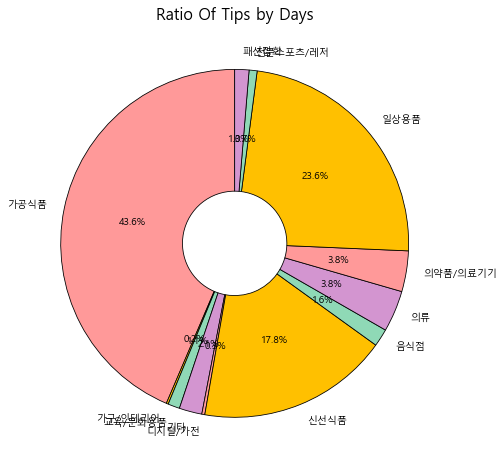

In [ ]:
plt.pie(c3_cluster_df.loc[0], labels=c3_cluster_df.columns.to_list(),
        autopct='%.1f%%', startangle=90,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'black','linewidth':0.8}        ) 
plt.title('Ratio Of Tips by Days', fontsize=16)
plt.show()

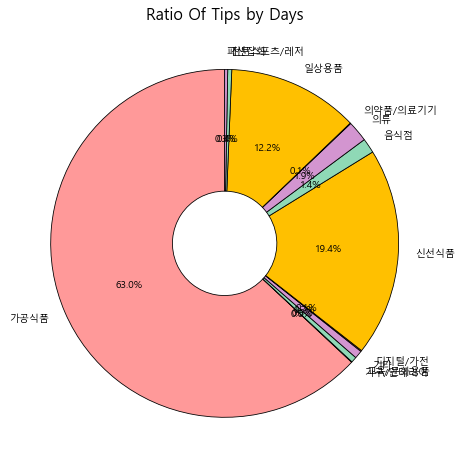

In [ ]:
plt.pie(c3_cluster_df.loc[1], labels=c3_cluster_df.columns.to_list(),
        autopct='%.1f%%', startangle=90,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'black','linewidth':0.8}        ) 
plt.title('Ratio Of Tips by Days', fontsize=16)
plt.show()

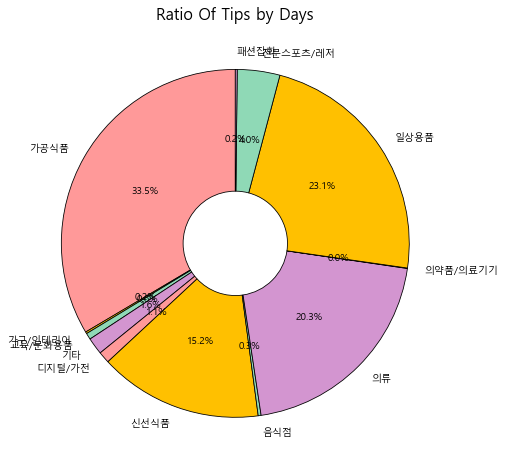

In [ ]:
plt.pie(c3_cluster_df.loc[2], labels=c3_cluster_df.columns.to_list(),
        autopct='%.1f%%', startangle=90,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'black','linewidth':0.8}        ) 
plt.title('Ratio Of Tips by Days', fontsize=16)
plt.show()

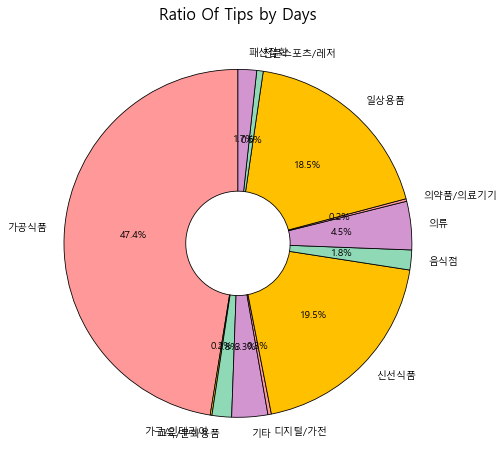

In [ ]:
plt.pie(c3_cluster_df.loc[3], labels=c3_cluster_df.columns.to_list(),
        autopct='%.1f%%', startangle=90,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'black','linewidth':0.8}        ) 
plt.title('Ratio Of Tips by Days', fontsize=16)
plt.show()

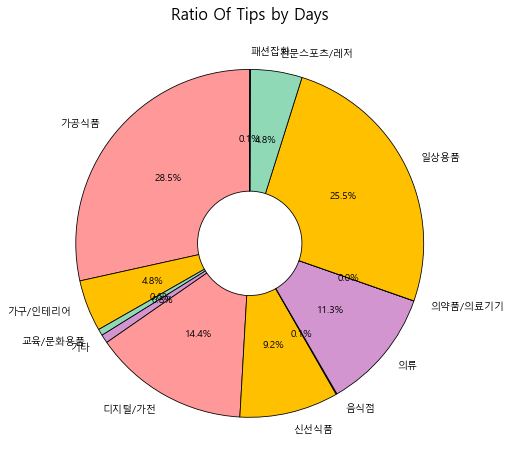

In [ ]:
plt.pie(c3_cluster_df.loc[4], labels=c3_cluster_df.columns.to_list(),
        autopct='%.1f%%', startangle=90,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'black','linewidth':0.8}        ) 
plt.title('Ratio Of Tips by Days', fontsize=16)
plt.show()

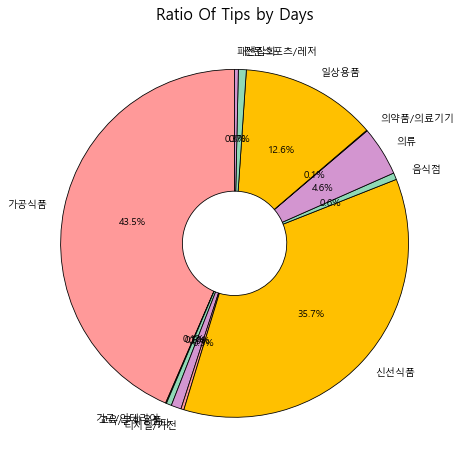

In [ ]:
plt.pie(c3_cluster_df.loc[5], labels=c3_cluster_df.columns.to_list(),
        autopct='%.1f%%', startangle=90,
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'black','linewidth':0.8}        ) 
plt.title('Ratio Of Tips by Days', fontsize=16)
plt.show()

In [ ]:
c3_cluster_df.columns.to_list()

['가공식품',
 '가구/인테리어',
 '교육/문화용품',
 '기타',
 '디지털/가전',
 '신선식품',
 '음식점',
 '의류',
 '의약품/의료기기',
 '일상용품',
 '전문스포츠/레저',
 '패션잡화']

## 고객특성 (부군집3)

In [ ]:
mem_demo_df = pd.read_csv('./data/lmemdata/고객DEMO.txt', sep=',', engine='python', encoding='cp949')
mem_demo_df

,고객번호,성별,연령대,거주지역
0,1,M,60세이상,60.00000
1,2,M,60세이상,100.00000
2,3,M,60세이상,33.00000
3,4,F,60세이상,16.00000
4,5,M,60세이상,100.00000
...,...,...,...,...
19378,19379,F,20세~24세,69.00000
19379,19380,F,20세~24세,39.00000
19380,19381,F,40세~44세,460.00000
19381,19382,F,45세~49세,460.00000


In [ ]:
mem_demo_df = mem_demo_df.merge(pur_cluster)
mem_demo_df

,고객번호,성별,연령대,거주지역,고객군집
0,1,M,60세이상,60.00000,유지
1,2,M,60세이상,100.00000,유지
2,3,M,60세이상,33.00000,유지
3,4,F,60세이상,16.00000,유지
4,5,M,60세이상,100.00000,감소
...,...,...,...,...,...
19378,19379,F,20세~24세,69.00000,증가1
19379,19380,F,20세~24세,39.00000,증가1
19380,19381,F,40세~44세,460.00000,증가1
19381,19382,F,45세~49세,460.00000,증가1


In [ ]:
mem_demo_df['연령대/성별'] = mem_demo_df['연령대'].str[:] + '-' + mem_demo_df['성별'].str[:]
mem_demo_df

,고객번호,성별,연령대,거주지역,고객군집,연령대/성별
0,1,M,60세이상,60.00000,유지,60세이상-M
1,2,M,60세이상,100.00000,유지,60세이상-M
2,3,M,60세이상,33.00000,유지,60세이상-M
3,4,F,60세이상,16.00000,유지,60세이상-F
4,5,M,60세이상,100.00000,감소,60세이상-M
...,...,...,...,...,...,...
19378,19379,F,20세~24세,69.00000,증가1,20세~24세-F
19379,19380,F,20세~24세,39.00000,증가1,20세~24세-F
19380,19381,F,40세~44세,460.00000,증가1,40세~44세-F
19381,19382,F,45세~49세,460.00000,증가1,45세~49세-F


In [ ]:
mem_by_ga_df = mem_demo_df.groupby(['고객군집', '연령대/성별'])[['고객번호']].count().reset_index().pivot('고객군집', '연령대/성별', '고객번호').fillna(0)
mem_by_ga_df

연령대/성별,19세이하-F,19세이하-M,20세~24세-F,20세~24세-M,25세~29세-F,25세~29세-M,30세~34세-F,30세~34세-M,35세~39세-F,35세~39세-M,40세~44세-F,40세~44세-M,45세~49세-F,45세~49세-M,50세~54세-F,50세~54세-M,55세~59세-F,55세~59세-M,60세이상-F,60세이상-M
고객군집,,,,,,,,,,,,,,,,,,,,
감소,2.00000,0.00000,33.00000,5.00000,70.00000,14.00000,119.00000,32.00000,176.00000,54.00000,182.00000,51.00000,202.00000,45.00000,134.00000,41.00000,82.00000,20.00000,68.00000,15.00000
유지,4.00000,4.00000,80.00000,11.00000,274.00000,70.00000,803.00000,252.00000,1506.00000,405.00000,2242.00000,511.00000,2674.00000,454.00000,2084.00000,348.00000,1147.00000,200.00000,822.00000,182.00000
증가1,5.00000,1.00000,66.00000,6.00000,77.00000,31.00000,105.00000,38.00000,96.00000,38.00000,146.00000,23.00000,158.00000,27.00000,120.00000,17.00000,53.00000,16.00000,25.00000,13.00000
증가2,0.00000,1.00000,71.00000,11.00000,121.00000,28.00000,256.00000,74.00000,393.00000,101.00000,426.00000,96.00000,431.00000,91.00000,298.00000,72.00000,208.00000,48.00000,139.00000,39.00000


In [ ]:
mem_by_ga_df['총계'] = mem_by_ga_df.sum(axis=1)

In [ ]:
mem_by_ga_df

연령대/성별,19세이하-F,19세이하-M,20세~24세-F,20세~24세-M,25세~29세-F,25세~29세-M,30세~34세-F,30세~34세-M,35세~39세-F,35세~39세-M,...,40세~44세-M,45세~49세-F,45세~49세-M,50세~54세-F,50세~54세-M,55세~59세-F,55세~59세-M,60세이상-F,60세이상-M,총계
고객군집,,,,,,,,,,,,,,,,,,,,,
감소,2.00000,0.00000,33.00000,5.00000,70.00000,14.00000,119.00000,32.00000,176.00000,54.00000,...,51.00000,202.00000,45.00000,134.00000,41.00000,82.00000,20.00000,68.00000,15.00000,1345.00000
유지,4.00000,4.00000,80.00000,11.00000,274.00000,70.00000,803.00000,252.00000,1506.00000,405.00000,...,511.00000,2674.00000,454.00000,2084.00000,348.00000,1147.00000,200.00000,822.00000,182.00000,14073.00000
증가1,5.00000,1.00000,66.00000,6.00000,77.00000,31.00000,105.00000,38.00000,96.00000,38.00000,...,23.00000,158.00000,27.00000,120.00000,17.00000,53.00000,16.00000,25.00000,13.00000,1061.00000
증가2,0.00000,1.00000,71.00000,11.00000,121.00000,28.00000,256.00000,74.00000,393.00000,101.00000,...,96.00000,431.00000,91.00000,298.00000,72.00000,208.00000,48.00000,139.00000,39.00000,2904.00000


In [ ]:
memmem_df = mem_by_ga_df.agg(lambda x : x / x['총계'], axis=1).drop(columns='총계').T
memmem_df

고객군집,감소,유지,증가1,증가2
연령대/성별,,,,
19세이하-F,0.00149,0.00028,0.00471,0.00000
19세이하-M,0.00000,0.00028,0.00094,0.00034
20세~24세-F,0.02454,0.00568,0.06221,0.02445
20세~24세-M,0.00372,0.00078,0.00566,0.00379
25세~29세-F,0.05204,0.01947,0.07257,0.04167
25세~29세-M,0.01041,0.00497,0.02922,0.00964
30세~34세-F,0.08848,0.05706,0.09896,0.08815
30세~34세-M,0.02379,0.01791,0.03582,0.02548
35세~39세-F,0.13086,0.10701,0.09048,0.13533


In [ ]:
memmem_df['감소'].rank(ascending=False).sort_values()

연령대/성별
45세~49세-F    1.00000
40세~44세-F    2.00000
35세~39세-F    3.00000
50세~54세-F    4.00000
30세~34세-F    5.00000
55세~59세-F    6.00000
25세~29세-F    7.00000
60세이상-F      8.00000
35세~39세-M    9.00000
40세~44세-M   10.00000
45세~49세-M   11.00000
50세~54세-M   12.00000
20세~24세-F   13.00000
30세~34세-M   14.00000
55세~59세-M   15.00000
60세이상-M     16.00000
25세~29세-M   17.00000
20세~24세-M   18.00000
19세이하-F     19.00000
19세이하-M     20.00000
Name: 감소, dtype: float64

In [ ]:
memmem_df['유지'].rank(ascending=False).sort_values()

연령대/성별
45세~49세-F    1.00000
40세~44세-F    2.00000
50세~54세-F    3.00000
35세~39세-F    4.00000
55세~59세-F    5.00000
60세이상-F      6.00000
30세~34세-F    7.00000
40세~44세-M    8.00000
45세~49세-M    9.00000
35세~39세-M   10.00000
50세~54세-M   11.00000
25세~29세-F   12.00000
30세~34세-M   13.00000
55세~59세-M   14.00000
60세이상-M     15.00000
20세~24세-F   16.00000
25세~29세-M   17.00000
20세~24세-M   18.00000
19세이하-M     19.50000
19세이하-F     19.50000
Name: 유지, dtype: float64

In [ ]:
memmem_df['증가1'].rank(ascending=False).sort_values()

연령대/성별
45세~49세-F    1.00000
40세~44세-F    2.00000
50세~54세-F    3.00000
30세~34세-F    4.00000
35세~39세-F    5.00000
25세~29세-F    6.00000
20세~24세-F    7.00000
55세~59세-F    8.00000
35세~39세-M    9.50000
30세~34세-M    9.50000
25세~29세-M   11.00000
45세~49세-M   12.00000
60세이상-F     13.00000
40세~44세-M   14.00000
50세~54세-M   15.00000
55세~59세-M   16.00000
60세이상-M     17.00000
20세~24세-M   18.00000
19세이하-F     19.00000
19세이하-M     20.00000
Name: 증가1, dtype: float64

In [ ]:
memmem_df['증가2'].rank(ascending=False).sort_values()

연령대/성별
45세~49세-F    1.00000
40세~44세-F    2.00000
35세~39세-F    3.00000
50세~54세-F    4.00000
30세~34세-F    5.00000
55세~59세-F    6.00000
60세이상-F      7.00000
25세~29세-F    8.00000
35세~39세-M    9.00000
40세~44세-M   10.00000
45세~49세-M   11.00000
30세~34세-M   12.00000
50세~54세-M   13.00000
20세~24세-F   14.00000
55세~59세-M   15.00000
60세이상-M     16.00000
25세~29세-M   17.00000
20세~24세-M   18.00000
19세이하-M     19.00000
19세이하-F     20.00000
Name: 증가2, dtype: float64